In [53]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go


In [2]:
df = pd.read_csv('cleaned_data.csv')
filtered_category = df[df['Category'] != 'All Other Remote']

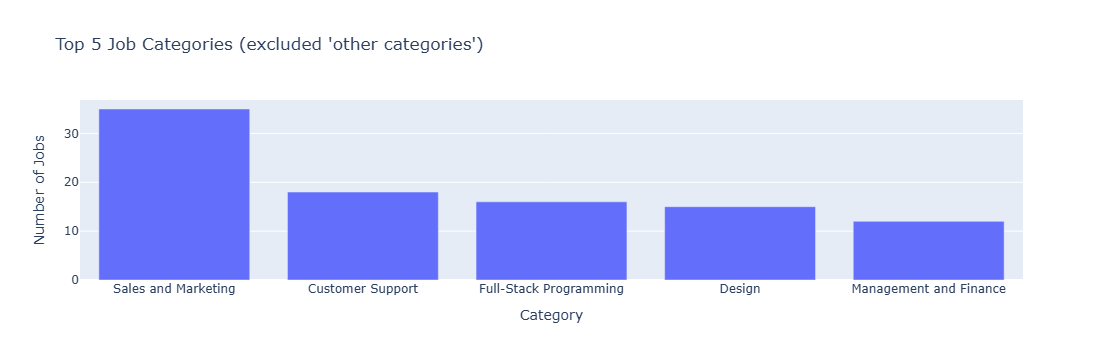

In [7]:
# Find the top 5 most common job categories
top_5_categories = filtered_category['Category'].value_counts().head(5)

# Create a bar chart using Plotly Express
bar_categories =    px.bar(
                    top_5_categories,
                    x=top_5_categories.index,
                    y=top_5_categories.values,
                    title="Top 5 Job Categories (excluded 'other categories')",
                    labels={'x': 'Category', 'y': 'Number of Jobs'})

bar_categories.update_traces(hovertemplate='<b>%{y}</b> jobs<extra></extra>')
bar_categories.update_layout(showlegend=False)

# In Jupyter, you can display the figure directly to test it
bar_categories.show()

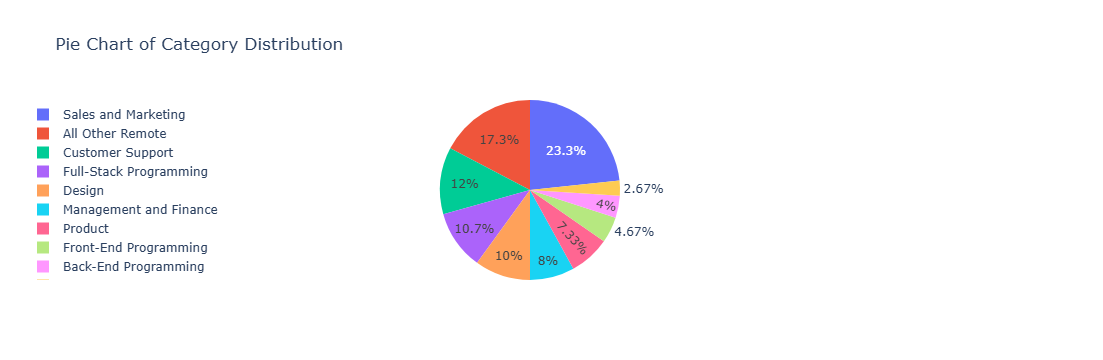

In [9]:
# Create category pie
categories = df['Category'].value_counts()

pie_categories = px.pie(
    categories,
    values = categories.values,
    names = categories.index,
    title = 'Pie Chart of Category Distribution'
)

pie_categories.update_layout(
    legend=dict(
        orientation="v",
        yanchor="auto",
        y=0.5,
        xanchor="right",
        x=0 
    )
)

pie_categories.update_traces(hovertemplate='<b>%{value}</b> jobs<extra></extra>')


pie_categories.show()

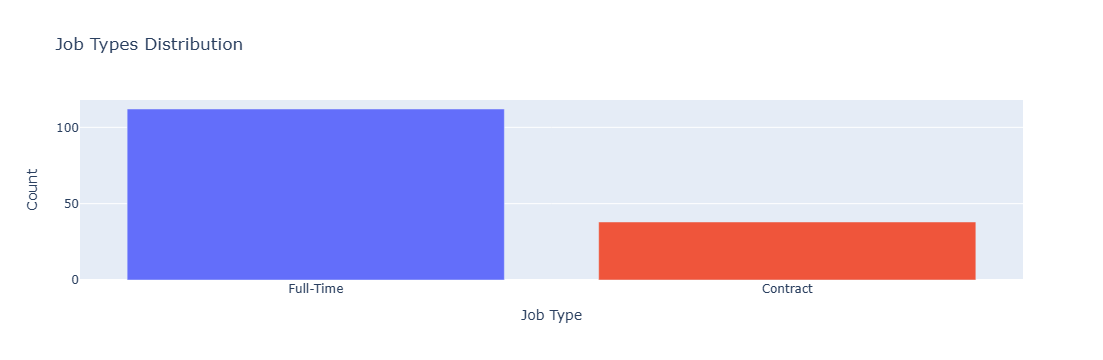

In [11]:
job_types = df['Job Type'].value_counts()

bar_jobtypes = px.bar(
    job_types,
    x = job_types.index,
    y = job_types.values,
    title = "Job Types Distribution",
    labels={'x': 'Job Types', 'y': 'Count'},
    color= job_types.index
)

bar_jobtypes.update_traces(hovertemplate='<b>%{y}</b> jobs<extra></extra>')
bar_jobtypes.update_layout(showlegend=False)

bar_jobtypes.show()

In [10]:
df

Ranking                                          Job Title  \
0          1                                    Account Manager   
1          2     Tech Lead, Web Core Product & Chrome Extension   
2          3                                     UI/UX Designer   
3          4                                     Sales Director   
4          5  Customer Support: Build the AI that will steal...   
..       ...                                                ...   
145      146                             Online English Teacher   
146      147                          Site Reliability Engineer   
147      148                          Senior Back-end Architect   
148      149  Client Onboarding for Corporate Services (Bank...   
149      150  Senior Independent Product Manager/Product Des...   

                       Company  Jobs Posted   Job Type               Category  \
0            BBE Marketing Inc          101  Full-Time    Sales and Marketing   
1                Speechify Inc           13   Contract  Front-End Programming   
2                    Files.com           33  Full-Time                 Design   
3    Wealth Without Wallstreet            1  Full-Time    Sales and Marketing   
4                      Evaboot            1   Contract       Customer Support   
..                         ...          ...        ...                    ...   
145          Pro\r Native Camp           31   Contract       All Other Remote   
146                      Float           64  Full-Time    DevOps and Sysadmin   
147                Swipe Games            1  Full-Time   Back-End Programming   
148                Flag Theory           10  Full-Time       Customer Support   
149                     A.Team            8  Full-Time                Product   

                    Salary                                             Skills  \
0                      NaN                                                NaN   
1                      NaN            JavaScript, React, Firebase, TypeScript   
2                      NaN                                                NaN   
3                      NaN                                                NaN   
4                      NaN  Chatbots, Prompt Engineering, Customer Support...   
..                     ...                                                ...   
145                    NaN                                                NaN   
146   $100,000 or more USD                                                NaN   
147  $75,000 - $99,999 USD                                 GoLang, TypeScript   
148                    NaN                                                NaN   
149                    NaN                                                NaN   

                    Region                                               Link  \
0    Anywhere in the World  https://weworkremotely.com/remote-jobs/bbe-mar...   
1    Anywhere in the World  https://weworkremotely.com/remote-jobs/speechi...   
2       Latin America Only  https://weworkremotely.com/remote-jobs/files-c...   
3    Anywhere in the World  https://weworkremotely.com/remote-jobs/wealth-...   
4    Anywhere in the World  https://weworkremotely.com/remote-jobs/evaboot...   
..                     ...                                                ...   
145  Anywhere in the World  https://weworkremotely.com/remote-jobs/native-...   
146  Anywhere in the World  https://weworkremotely.com/remote-jobs/float-s...   
147  Anywhere in the World  https://weworkremotely.com/remote-jobs/swipe-g...   
148  Anywhere in the World  https://weworkremotely.com/remote-jobs/flag-th...   
149  Anywhere in the World  https://weworkremotely.com/remote-jobs/a-team-...   

     min_salary  max_salary  average_salary  
0           NaN         NaN             NaN  
1           NaN         NaN             NaN  
2           NaN         NaN             NaN  
3           NaN         NaN             NaN  
4           NaN         NaN             NaN  
..   

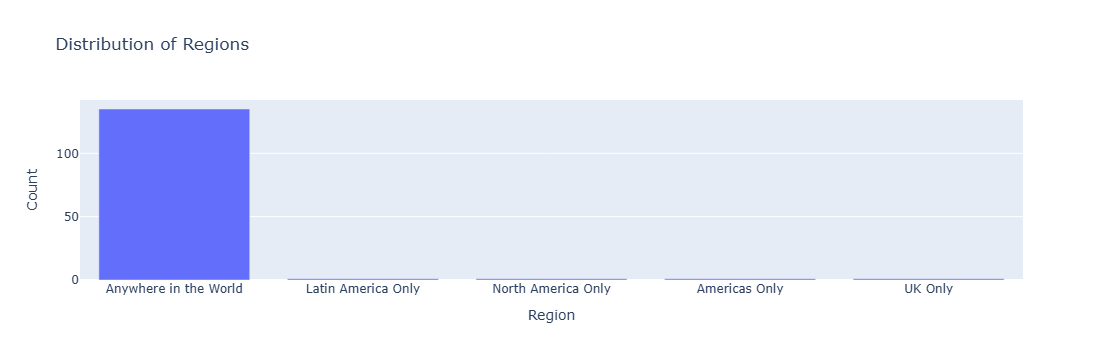

In [15]:
regions = df['Region'].value_counts()

bar_regions = px.bar(
    regions,
    x = regions.index,
    y = regions.values,
    title = "Distribution of Regions",
    labels={'x':'Region', 'y':'Count'}
)

bar_regions.update_traces(hovertemplate='<b>%{y}</b> jobs<extra></extra>')


bar_regions.show()

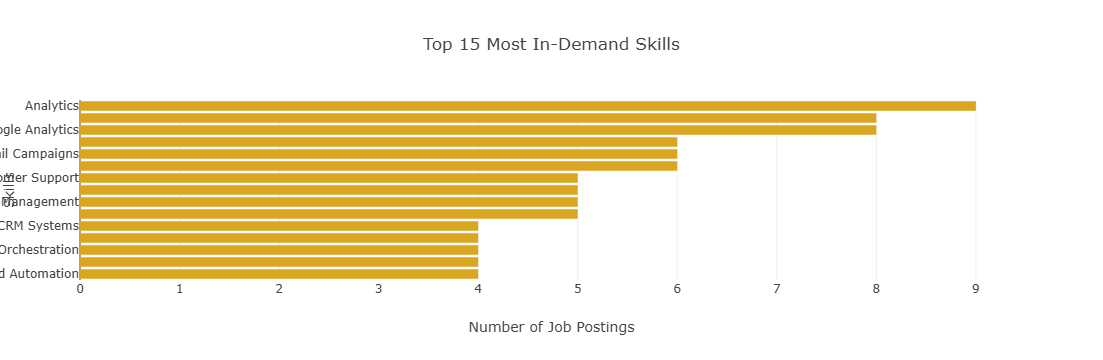

In [63]:
df_skills = df.dropna(subset=['Skills']).copy()

skills_lists = df_skills['Skills'].str.split(', ')

individual_skills = skills_lists.explode()

top15_skills = individual_skills.value_counts().head(15)

bar_skills = px.bar(
    skill_counts,
    x=skill_counts.values,
    y=skill_counts.index,
    orientation='h',
    title='Top 15 Most In-Demand Skills',
    labels={'x': 'Number of Job Postings', 'y': 'Skill'},
    color=skill_counts.index
)

bar_skills.update_traces(hovertemplate='<b>%{y}</b><extra></extra>')
bar_skills.update_traces(marker_color='goldenrod')
bar_skills.update_layout(showlegend=False)


bar_skills.show()

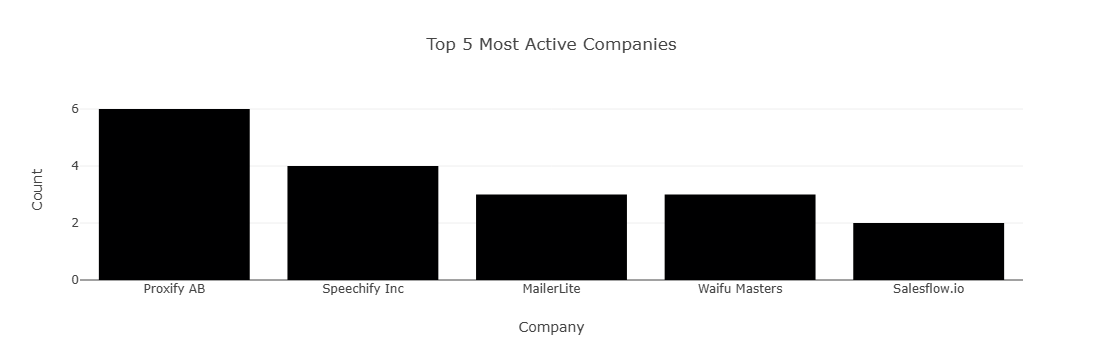

In [72]:
companies = df['Company'].value_counts().head(5)

bar_companies = px.bar(
    companies,
    x = companies.index,
    y = companies.values,
    title = 'Top 5 Most Active Companies',
    labels = {'x':'Company',
              'y':'Count'}
)

bar_companies.update_traces(hovertemplate='<b>%{y}</b> Jobs<extra></extra>')


bar_companies.show()